In [ ]:
#import libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [ ]:
#function we want to approximate
#y = 3 * x^2 + 6
def f(x):
    return 3 * x**2 + 6
x = np.arange(-10, 10.01, .01)
y = f(x)

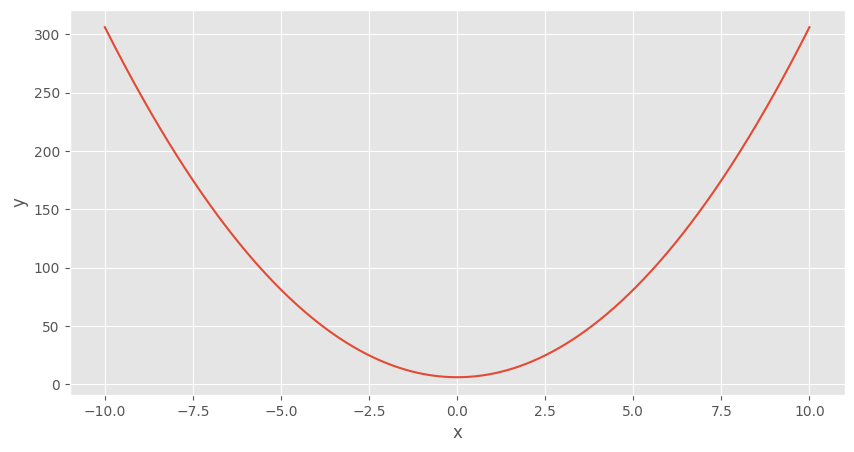

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
#build the training and test datasets
X = x
y = y
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
ANN = Sequential()
ANN.add(Dense(10,input_dim = 1, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(1))

In [ ]:
#Loss function = MSE, optimizer: Adam
ANN.compile(loss = 'mean_squared_error', optimizer='adam')
# fit the ANN on the training dataset
ANN.fit(X_train, y_train, epochs = 150, batch_size = 16)

Epoch 1/150
94/94 [==============================] - 2s 2ms/step - loss: 18974.4707
Epoch 2/150
94/94 [==============================] - 0s 2ms/step - loss: 18176.1914
Epoch 3/150
94/94 [==============================] - 0s 2ms/step - loss: 12027.6895
Epoch 4/150
94/94 [==============================] - 0s 2ms/step - loss: 2051.3513
Epoch 5/150
94/94 [==============================] - 0s 2ms/step - loss: 1377.7896
Epoch 6/150
94/94 [==============================] - 0s 2ms/step - loss: 1254.8672
Epoch 7/150
94/94 [==============================] - 0s 2ms/step - loss: 1146.0170
Epoch 8/150
94/94 [==============================] - 0s 2ms/step - loss: 1049.3478
Epoch 9/150
94/94 [==============================] - 0s 2ms/step - loss: 965.1672
Epoch 10/150
94/94 [==============================] - 0s 2ms/step - loss: 876.3810
Epoch 11/150
94/94 [==============================] - 0s 2ms/step - loss: 797.7224
Epoch 12/150
94/94 [==============================] - 0s 2ms/step - loss: 725.4440
Ep

In [ ]:
#prediction
y_pred = ANN.predict(X_test)

16/16 [==============================] - 0s 2ms/step


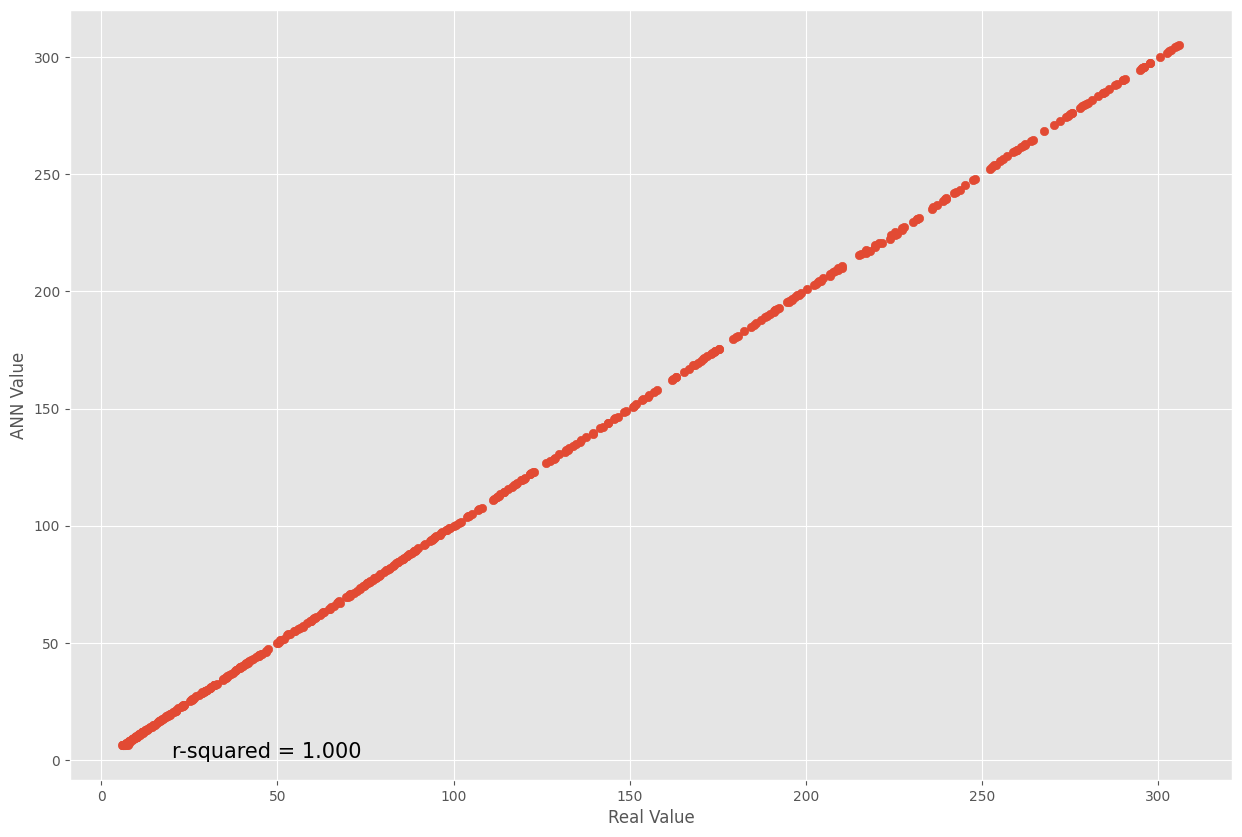

In [ ]:
#Comparison real values and predictions on test dataset
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size = 15)
plt.show();

In [ ]:
#Extrapolation with ANN
X = np.arange(-20, 20.01, .01)
y = f(X)
y_pred = ANN.predict(X)

126/126 [==============================] - 0s 3ms/step


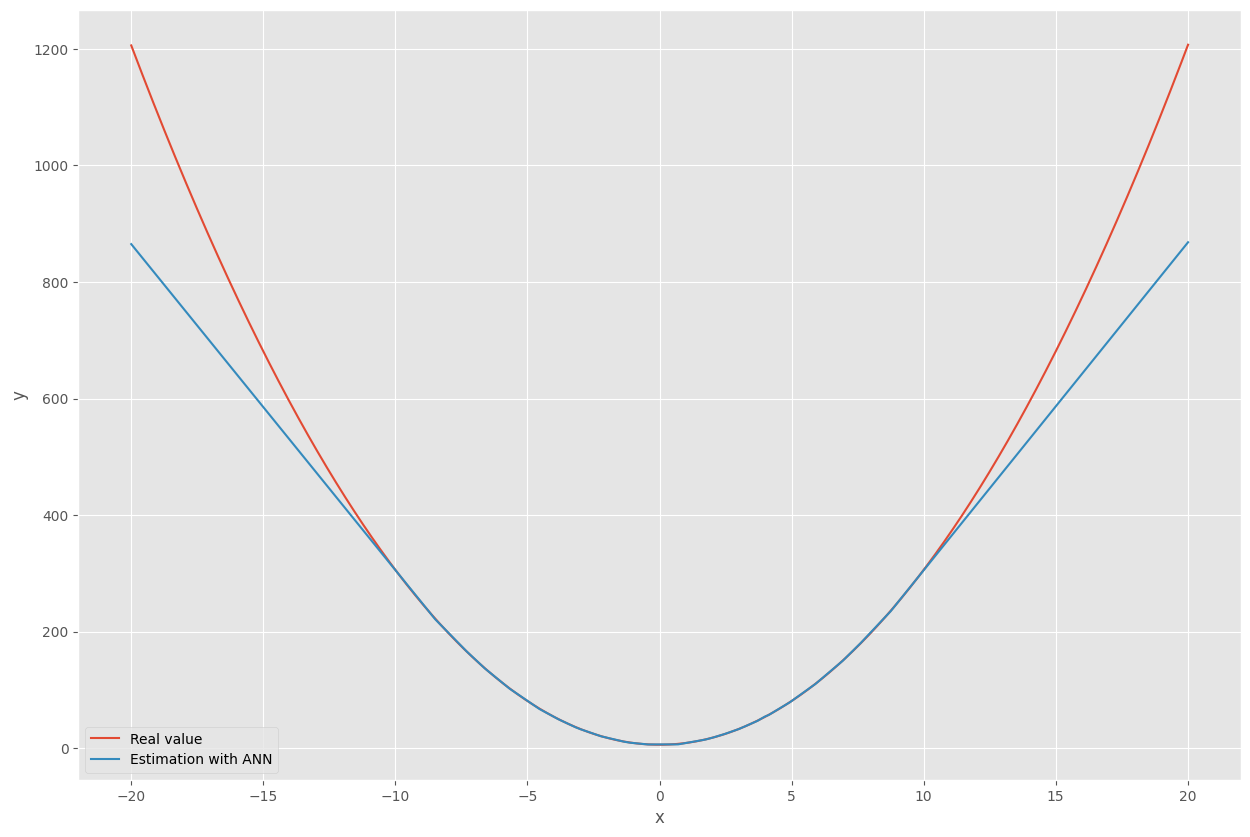

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(X, y, label = "Real value")
plt.plot(X, y_pred, label = "Estimation with ANN")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
class EuropeanOptionBS:

    def __init__(self, S, K, T, r, q, sigma,Type):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma
        self.Type = Type
        self.d1 = self.d1()
        self.d2 = self.d2()
        self.price = self.price()

    def d1(self):
        d1 = (math.log(self.S / self.K) \
                   + (self.r - self.q + .5 * (self.sigma ** 2)) * self.T) \
                    / (self.sigma * self.T ** .5)
        return d1

    def d2(self):
        d2 = self.d1 - self.sigma * self.T ** .5
        return d2

    def price(self):
        if self.Type == "Call":
            price = self.S * math.exp(-self.q * self.T) * norm.cdf(self.d1) \
            - self.K * math.exp(-self.r *self.T) * norm.cdf(self.d2)
        if self.Type == "Put":
            price = self.K * math.exp(-self.r * self.T) * norm.cdf(-self.d2) \
            - self.S * math.exp(-self.q * self.T) * norm.cdf(-self.d1)
        return price

In [ ]:
#dataset
r = np.arange(.0, .1, .01) #interest rates
Strike = np.arange(50, 155, 5) #strike price
T = np.arange(0.1, 2.1, 0.1) #time to maturity
sigma = np.arange(0.1, 2.1, .1) #volatility

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                data.append([r_, Strike_, T_, sigma_, \
                             EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price])
data = np.asarray(data)

In [ ]:
#training and test datasets
X = data[:,:4] #params r, strike, T, sigma
y = data[:,4:5] #call price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#ANN with four layers, 10 neurons each
#activation function: ReLU
ANN = Sequential()
ANN.add(Dense(10,input_dim = 4, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(10, activation = 'relu'))
ANN.add(Dense(1))

In [ ]:
#Loss function = MSE, optimizer: Adam
ANN.compile(loss = 'mean_squared_error', optimizer='adam')
# fit the ANN on the training dataset
ANN.fit(X_train, y_train, epochs = 150, batch_size = 16)

Epoch 1/150
3938/3938 [==============================] - 12s 3ms/step - loss: 274.7038
Epoch 2/150
3938/3938 [==============================] - 13s 3ms/step - loss: 53.0197
Epoch 3/150
3938/3938 [==============================] - 8s 2ms/step - loss: 52.3382
Epoch 4/150
3938/3938 [==============================] - 9s 2ms/step - loss: 51.7704
Epoch 5/150
3938/3938 [==============================] - 9s 2ms/step - loss: 49.8368
Epoch 6/150
3938/3938 [==============================] - 13s 3ms/step - loss: 48.2198
Epoch 7/150
3938/3938 [==============================] - 11s 3ms/step - loss: 46.9595
Epoch 8/150
3938/3938 [==============================] - 8s 2ms/step - loss: 37.0017
Epoch 9/150
3938/3938 [==============================] - 9s 2ms/step - loss: 24.3180
Epoch 10/150
3938/3938 [==============================] - 8s 2ms/step - loss: 22.5319
Epoch 11/150
3938/3938 [==============================] - 8s 2ms/step - loss: 22.2188
Epoch 12/150
3938/3938 [==============================] - 

657/657 [==============================] - 1s 1ms/step


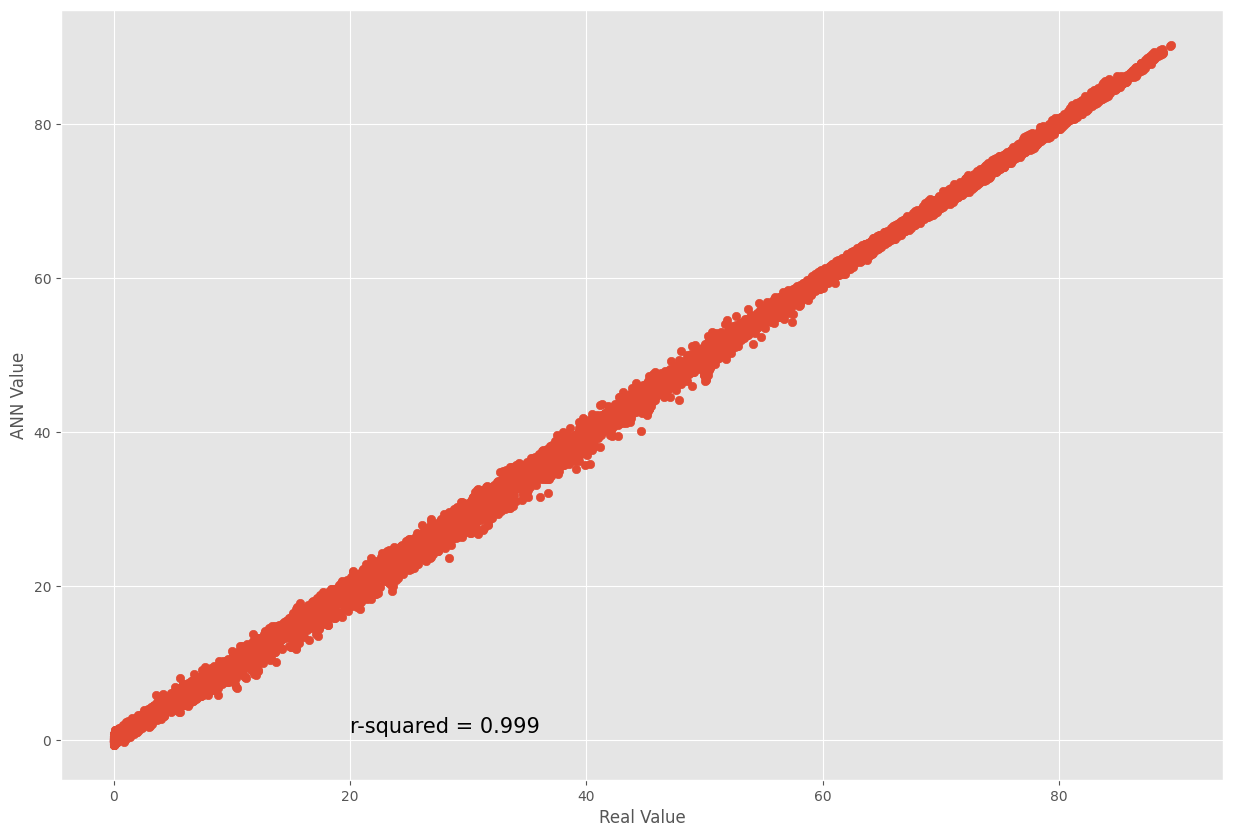

In [ ]:
#prediction
y_pred = ANN.predict(X_test)

#Comparison real values and predictions on test dataset
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (20, 1), size = 15)
plt.show();

In [ ]:
K = 120 #strike price
r = 0.05 #risk-free interest rate
sigma = .3 #implied volatiltiy
T = .5 #time to maturity
S = np.arange(50, 151, 1) #asset prices

PriceBS = [EuropeanOptionBS(S_, K, T, r, 0, sigma, "Call").price for S_ in S]
PriceANN = [S_ / 100 * \
            ANN.predict(np.array([[r, K / S_ * 100, T, sigma]]))[0][0] for S_ in S]

1/1 [==============================] - 0s 31ms/step


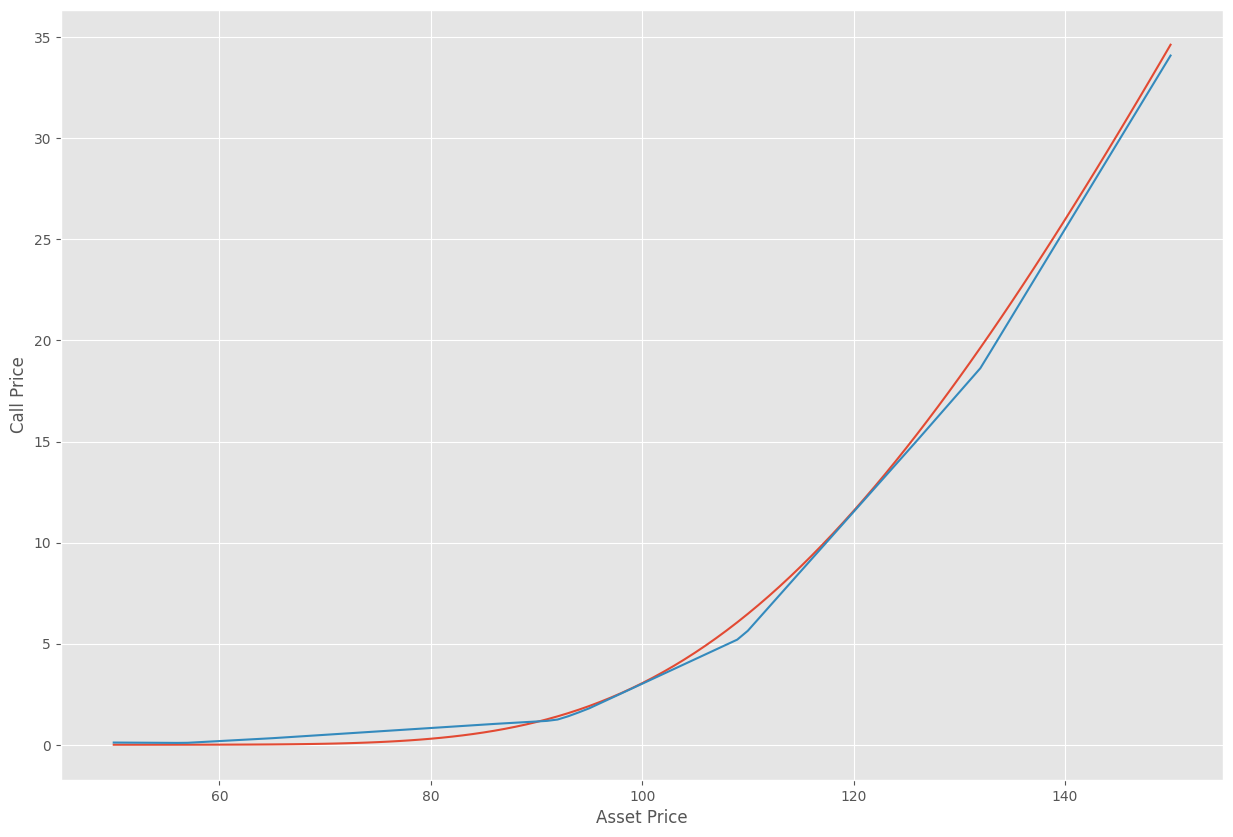

In [ ]:
#Comparison BS vs ANN prices
plt.figure(figsize = (15,10))
plt.plot(S, PriceBS, label = "Black-Scholes price")
plt.plot(S, PriceANN, label = "ANN price")
plt.xlabel("Asset Price")
plt.ylabel("Call Price")
plt.show();